# Student Information
Name: 林育陞

Student ID: 112034515

GitHub ID: kevinyusheng

Kaggle name: KEV_112034515

Kaggle private scoreboard snapshot: 

![Snapshot](../pics/Leaderboard.png)

## Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

# Data Mining Lab2 Master
In this lab session we will focus on the use of Neural Word Embeddings 

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization



### Necessary Library Requirements:

#### Same as Lab1:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 sklearn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embedding and other deep information retrieval approaches.

![pic0](../pics/pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("../data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("../data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [6]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')

BOW_vectorizer = CountVectorizer(tokenizer=nltk.word_tokenize) 
BOW_vectorizer.fit(train_df['text'])

# extract features
train_data_BOW_features_array = BOW_vectorizer.transform(train_df['text']).toarray()
test_data_BOW_features_array = BOW_vectorizer.transform(test_df['text']).toarray()
feature_names = BOW_vectorizer.get_feature_names_out()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\112034515\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\112034515\AppData\Local\anaconda3\envs\AI\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


C:\Users\112034515\AppData\Local\Temp\ipykernel_22128\612864699.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pic_1=sns.barplot(x=df_train['terms'], y=df_train['count'],ax=axs[0], palette= 'hls')
C:\Users\112034515\AppData\Local\Temp\ipykernel_22128\612864699.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pic_1.set_xticklabels(df_train['terms'], rotation = 90)
C:\Users\112034515\AppData\Local\Temp\ipykernel_22128\612864699.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pic_2=sns.barplot(x=df_test['terms'], y=df_test['count'],ax=axs[1], palette= 'hls')
C:\Users\112034515\AppData\Local\Temp\ipykernel_22128\6128646

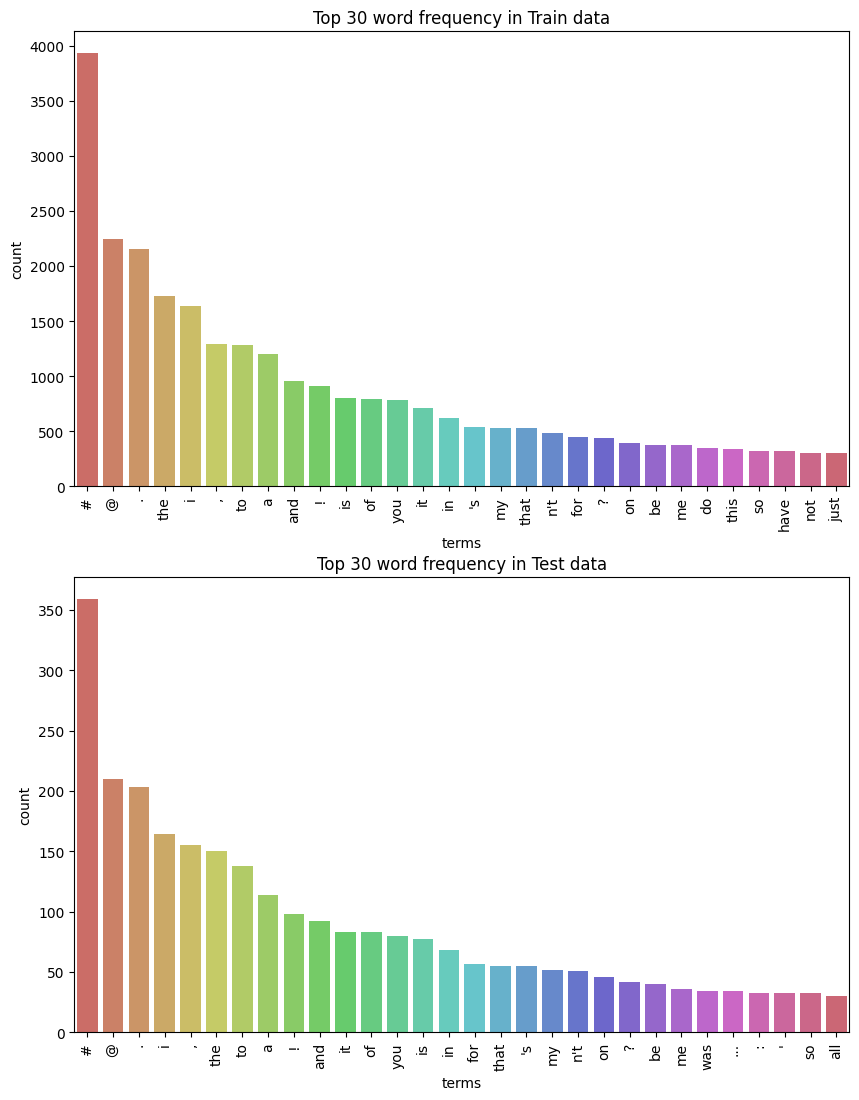

In [7]:
#plot training data and testing data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

df_train=pd.DataFrame(zip(train_data_BOW_features_array.sum(axis=0),feature_names),columns=['count','terms'])
df_train=df_train.sort_values('count',ascending=False)[:30]

df_test=pd.DataFrame(zip(test_data_BOW_features_array.sum(axis=0),feature_names),columns=['count','terms'])
df_test=df_test.sort_values('count',ascending=False)[:30]

fig, axs = plt.subplots(2, 1, figsize=(10, 13))
axs[0].set_title('Top 30 word frequency in Train data')
pic_1=sns.barplot(x=df_train['terms'], y=df_train['count'],ax=axs[0], palette= 'hls')
pic_1.set_xticklabels(df_train['terms'], rotation = 90)

axs[1].set_title('Top 30 word frequency in Test data')
pic_2=sns.barplot(x=df_test['terms'], y=df_test['count'],ax=axs[1], palette= 'hls')
pic_2.set_xticklabels(df_test['terms'], rotation = 90);

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [8]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [9]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [10]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

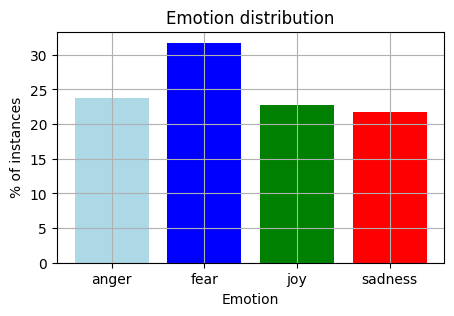

In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

color = ['lightblue', 'blue', 'green', 'red']

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values,color = color)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [61]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [62]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [63]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [64]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [65]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [66]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [67]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [68]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\112034515\AppData\Local\anaconda3\envs\AI\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [69]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [70]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [71]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [72]:
# Answer here
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000,tokenizer=nltk.word_tokenize)
tf_idf_train = vectorizer.fit_transform(train_df['text'])

# check dimension
print(tf_idf_train.shape)

# observe some feature names
feature_1000 = vectorizer.get_feature_names_out()
feature_1000[100:110]

(3613, 1000)


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [74]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'joy', 'fear', 'anger', 'sadness', 'fear', 'anger', 'joy',
       'fear', 'anger'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [75]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [76]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [77]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [78]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

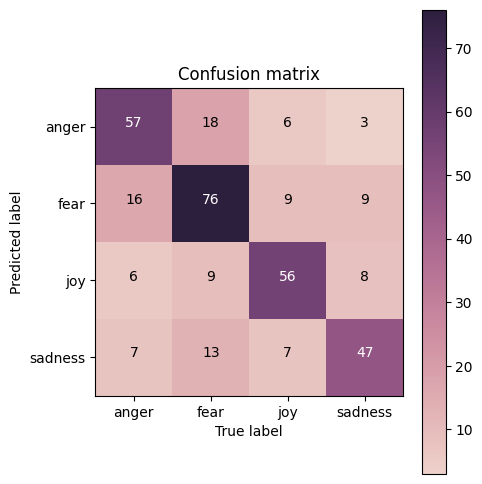

In [79]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

### Answer here
1. Fear is more distinguishable.
2. In wrong predictions, more data are predicted as Fear.
3. We get more data labeled as Fear in every dataset.
4. Sadness and Anger tend to be predicted as Fear.


C:\Users\112034515\AppData\Local\Temp\ipykernel_1768\3848882226.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test,ax=axs[0], palette= 'hls')
C:\Users\112034515\AppData\Local\Temp\ipykernel_1768\3848882226.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train,ax=axs[1], palette= 'hls')
C:\Users\112034515\AppData\Local\Temp\ipykernel_1768\3848882226.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test_pred,ax=axs[2], palette= 'hls');


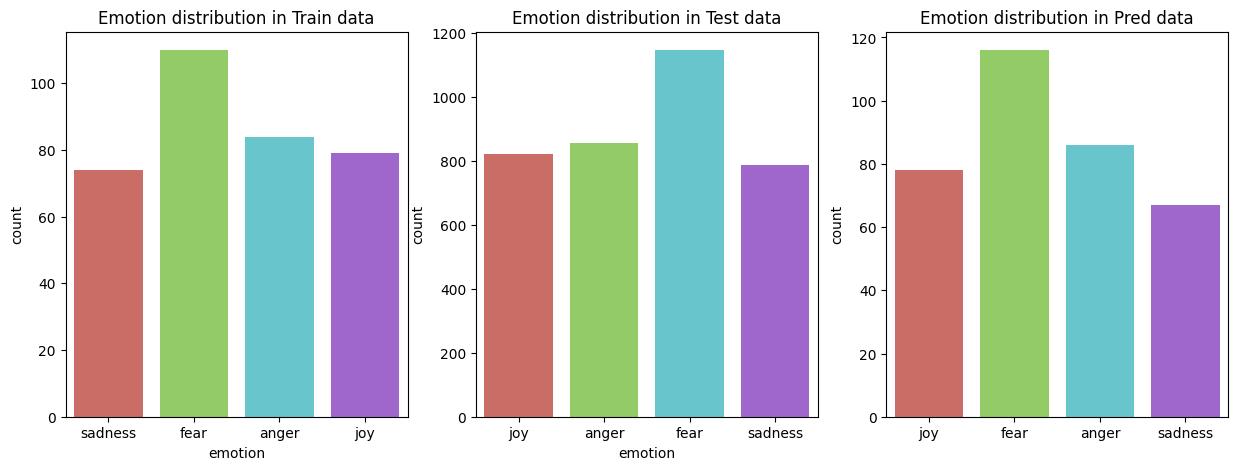

In [80]:
# Answer here
# Emotion distribution
fig, axs = plt.subplots(1, 3,figsize=(15,5))
axs[0].set_title('Emotion distribution in Train data')
axs[1].set_title('Emotion distribution in Test data')
axs[2].set_title('Emotion distribution in Pred data')
sns.countplot(x=y_test,ax=axs[0], palette= 'hls')
sns.countplot(x=y_train,ax=axs[1], palette= 'hls')
sns.countplot(x=y_test_pred,ax=axs[2], palette= 'hls');

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [81]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)

y_train_pred_NB=NB.predict(X_train)
y_test_pred_NB=NB.predict(X_test)

In [82]:
## precision, recall, f1-score for train data
from sklearn.metrics import classification_report

print(classification_report(y_true=y_train, y_pred=y_train_pred_NB))

              precision    recall  f1-score   support

       anger       0.77      0.80      0.78       857
        fear       0.78      0.81      0.79      1147
         joy       0.87      0.80      0.83       823
     sadness       0.76      0.75      0.76       786

    accuracy                           0.79      3613
   macro avg       0.79      0.79      0.79      3613
weighted avg       0.79      0.79      0.79      3613



In [83]:
## precision, recall, f1-score for test data
print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Answer here
In Decision Tree model, we can get a conclusion that the model is quite overfitting. Since we can see that F1-Score is incredibly high in training, but F1-Score is a lot lower in testing.

As for NB model, although we got lower F1-Score in training compared to Decision Tree model. However, F1-Score in testing is actually better, and the gap between performance of train and test data predictions are much smaller. In conclusion, we can say that NB model is not as overfitting as the previous one.

Besides current outcome, if we want to improve the performance, we can either do hyperparameters tuning on model or ponder on some other preprocessing for dataset. For example, using different tokenizer or different way to vectorize our text data.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](../pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [84]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [85]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2826        joy
235       anger
1553       fear
3035    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [86]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](../pics/pic2.png)

In [87]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0   

### 6.4 Train

In [88]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('../logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


113/113 [==============================] - 1s 2ms/step - loss: 1.3075 - accuracy: 0.3939 - val_loss: 1.2583 - val_accuracy: 0.4841
Epoch 2/25
113/113 [==============================] - 0s 1ms/step - loss: 0.9420 - accuracy: 0.6634 - val_loss: 0.9408 - val_accuracy: 0.6686
Epoch 3/25
113/113 [==============================] - 0s 1ms/step - loss: 0.5682 - accuracy: 0.8018 - val_loss: 0.7911 - val_accuracy: 0.6888
Epoch 4/25
113/113 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8381 - val_loss: 0.8344 - val_accuracy: 0.6888
Epoch 5/25
113/113 [==============================] - 0s 1ms/step - loss: 0.3353 - accuracy: 0.8738 - val_loss: 0.8580 - val_accuracy: 0.6859
Epoch 6/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2756 - accuracy: 0.9031 - val_loss: 0.8844 - val_accuracy: 0.6715
Epoch 7/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2268 - accuracy: 0.9261 - val_loss: 0.9327 - val_accuracy: 0.6657
Epoc

### 6.5 Predict on testing data

In [89]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 2ms/step


array([[1.0499132e-01, 1.6114983e-03, 8.9267832e-01, 7.1886933e-04],
       [9.5231691e-03, 8.7557901e-06, 1.4469886e-01, 8.4576923e-01],
       [6.0656515e-07, 9.1394562e-01, 8.6053088e-02, 6.6996597e-07],
       [6.7034721e-02, 9.1707218e-01, 5.7210163e-03, 1.0171980e-02],
       [8.2610732e-06, 3.7100140e-02, 4.2200583e-05, 9.6284932e-01]],
      dtype=float32)

In [90]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'sadness', 'fear', 'fear', 'sadness'], dtype=object)

In [91]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [92]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("../logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.393856,1.307475,0.484150,1.258272
1,1,0.663438,0.942014,0.668588,0.940839
2,2,0.801827,0.568171,0.688761,0.791053
3,3,0.838085,0.418838,0.688761,0.834371
4,4,0.873789,0.335267,0.685879,0.858034
5,5,0.903128,0.275628,0.671470,0.884359
6,6,0.926100,0.226844,0.665706,0.932735
7,7,0.936618,0.190761,0.691643,0.988318
8,8,0.949350,0.163464,0.671470,1.059267
9,9,0.955439,0.148180,0.682997,1.093913


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="../pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="../pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

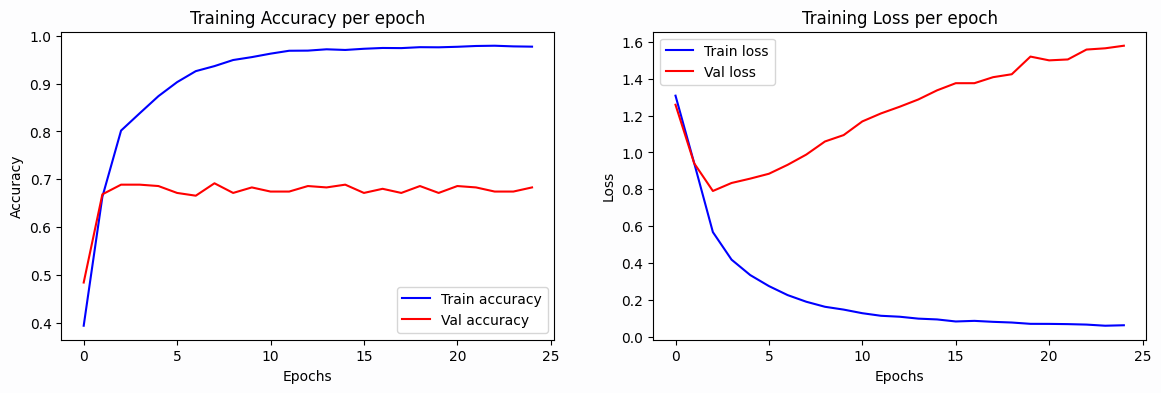

In [93]:
epochs = range(0,25)

fig,axs=plt.subplots(1,2,figsize=(14,4))
fig.set_facecolor('xkcd:pale gray')

axs[0].plot(epochs, training_log['accuracy'],'b', label='Train accuracy')
axs[0].plot(epochs, training_log['val_accuracy'], 'r', label='Val accuracy')
axs[0].set_title('Training Accuracy per epoch')
axs[0].set(xlabel='Epochs',ylabel='Accuracy')
axs[0].legend()

axs[1].plot(epochs, training_log['loss'],'b', label='Train loss')
axs[1].plot(epochs, training_log['val_loss'], 'r', label='Val loss')
axs[1].set_title('Training Loss per epoch')
axs[1].set(xlabel='Epochs',ylabel='Loss')
axs[1].legend()
plt.show()

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [96]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2826,30822,@DamnPatriot You're a POS for rejoicing in som...,"[@, DamnPatriot, You, 're, a, POS, for, rejoic..."
235,10235,@DFSCare apparently you are to contact me. Sof...,"[@, DFSCare, apparently, you, are, to, contact..."
1553,20696,Heard of panic! At the disco? How about Kach-i...,"[Heard, of, panic, !, At, the, disco, ?, How, ..."
3035,40208,"@happyandbashful Flirt, simper, pout, repeat. ...","[@, happyandbashful, Flirt, ,, simper, ,, pout..."
2832,40005,So when I try I fail... and when I don't try.....,"[So, when, I, try, I, fail, ..., and, when, I,..."


In [97]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'DamnPatriot', 'You', "'re", 'a', 'POS', 'for', 'rejoicing', 'in', 'someone', "'s", 'death', '.']),
       list(['@', 'DFSCare', 'apparently', 'you', 'are', 'to', 'contact', 'me', '.', 'Sofas', 'were', 'meant', 'to', 'be', 'delivered', 'today', '.', 'Old', 'ones', 'gone', '.', 'Sitting', 'on', 'floor', '.', 'No', 'sofas', '!']),
       list(['Heard', 'of', 'panic', '!', 'At', 'the', 'disco', '?', 'How', 'about', 'Kach-ing', '!', 'at', 'the', 'ATM'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [98]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [99]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.30504534,  0.09861211, -0.20276143,  0.2313041 ,  0.05093347,
       -1.1190087 ,  0.5508157 ,  1.2373424 , -0.7182138 , -0.98745054,
       -0.45278975, -0.43494338, -0.8081773 ,  0.06833742,  0.39573437,
       -0.52475286, -0.00444821, -0.9932266 ,  0.31090793, -1.0077748 ,
        0.6511088 ,  0.52648973,  0.8247275 , -0.03609452,  0.33640942,
       -0.00962839, -0.4855785 ,  0.45800662, -0.46990135,  0.49880064,
        0.3026221 , -0.12438708,  0.5933969 , -0.6005782 , -0.16983855,
        0.5049671 ,  0.57065725, -0.20351529, -0.5967675 , -0.95952815,
        0.6070789 ,  0.23839   , -0.28534007,  0.61897504,  0.86747926,
       -0.10076635, -0.45659977, -0.31507614,  0.9441873 ,  0.48461398,
        0.13783146, -0.08349774,  0.18731134, -0.01671976, -0.48187304,
       -0.19836488,  0.01271863, -0.25408152, -0.16739209, -0.03118074,
       -0.21992767,  0.02432167,  0.32597774,  0.17475381, -1.0579485 ,
        0.7026151 ,  0.20860796,  0.5418214 , -1.4217556 ,  0.29

In [100]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Makes', 0.94083172082901),
 ('Be', 0.9210992455482483),
 ('birthday', 0.9114141464233398),
 ('blessed', 0.9095437526702881),
 ('help', 0.9082726240158081),
 ('win', 0.9038063287734985),
 ('blessing', 0.9004022479057312),
 ('trigger', 0.9003081917762756),
 ('meant', 0.8973926901817322),
 ('right', 0.8964498043060303)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?resourcekey=0-wjGZdNAUop6WykTtMip30g)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [103]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "../GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [104]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[===========---------------------------------------] 22.4% 23.4/104.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================----------------------] 56.8% 59.5/104.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================================----] 93.3% 97.8/104.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [102]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


### Answer here
Three directions to represent sentcences by its vectors:
1. Average (Word2Vec vectors) : Take the average of all the word vectors in a sentence.
2. Average (Word2Vec vectors with TF-IDF) : Take the word vectors and multiply it with their TF-IDF scores.
3. Other Vectorize methods : Such as Doc2Vec, we can just gather vectors for each sentence.

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [110]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [111]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![Imgur](../pics/pic6.png)

In [112]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [113]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below:

![Image](../pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [107]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE (2-dimension)

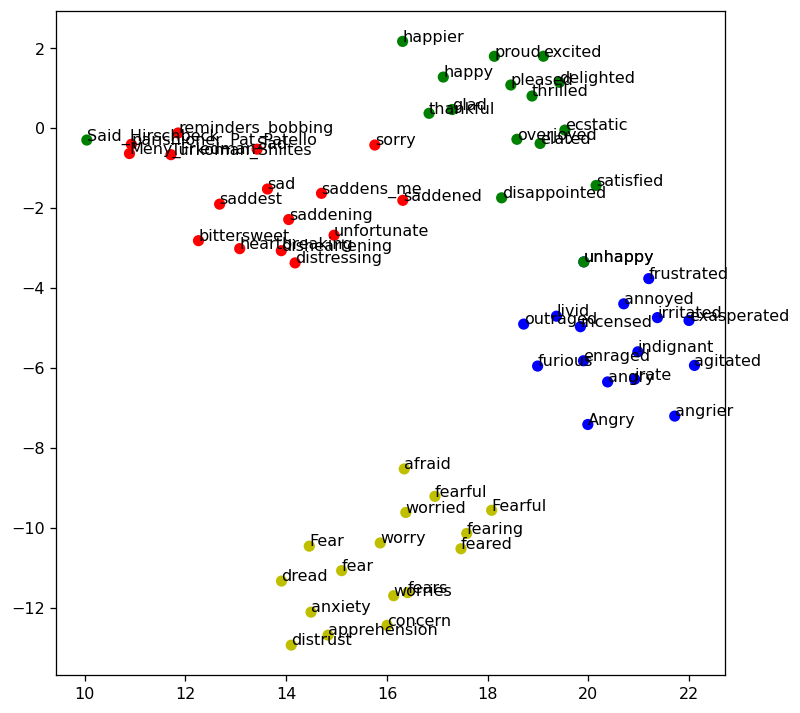

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']

sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']

fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated',

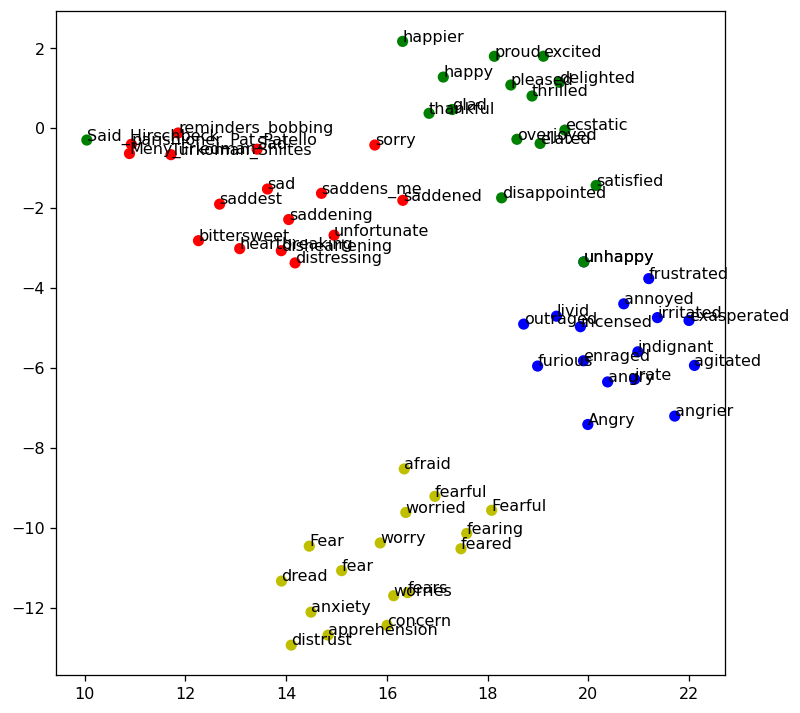

In [116]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]  
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('\nhappy_words: ', happy_words)
print('\nsad_words: ', sad_words)
print('\nfear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)



## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
#all_word = list(model.vocab.keys())
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points',fontsize=10)

plt.show()

# Third:  My Report for the Kaggle Competition
This part is worth 30% of your grade.  A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.corpus import stopwords
import regex as re
from nltk.stem import WordNetLemmatizer
import nltk
from tqdm import tqdm
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
from transformers import BertForSequenceClassification
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import f1_score
import random
nltk.download('punkt')

C:\Users\112034515\AppData\Local\anaconda3\envs\AI\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\112034515\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Load Data

In [2]:
df_emotion=pd.read_csv('./dm2023-isa5810-lab2-homework/emotion.csv')
df_emotion

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [3]:
df_id=pd.read_csv('./dm2023-isa5810-lab2-homework/data_identification.csv')
df_id.head()

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


In [4]:
# Extract data we want from json document
id_list=[]
text_list=[]
score_list=[]
with open(r'./dm2023-isa5810-lab2-homework/tweets_DM.json','r') as f:
    into_list=f.readlines()
    for data_json in into_list:
        data=json.loads(data_json)
        score_list.append(data['_score'])
        id_list.append(data['_source']['tweet']['tweet_id'])
        text_list.append(data['_source']['tweet']['text'])
data_tweet={"tweet_id":id_list,"text":text_list,"score":score_list}
df_all=pd.DataFrame(data_tweet)

#df_all['id']=df_all['tweet_id'].apply(lambda x: int(x,16))
#df_all=df_all.sort_values(by=['id'])
df_all.head()

,tweet_id,text,score
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",391
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",433
2,0x28b412,"Confident of your obedience, I write to you, k...",232
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,376
4,0x2de201,"""Trust is not the same as faith. A friend is s...",989


In [5]:
# Merge the extracted data from json and the label data together

df_all=pd.merge(df_all,df_id,on='tweet_id',how='outer')
df_all= pd.merge(df_all,df_emotion,on='tweet_id',how= 'outer')
df_all.head()                               

,tweet_id,text,score,identification,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",391,train,anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",433,train,sadness
2,0x28b412,"Confident of your obedience, I write to you, k...",232,test,NaN
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,376,train,fear
4,0x2de201,"""Trust is not the same as faith. A friend is s...",989,test,NaN


In [6]:
# Save
df_all.to_csv('./dm2023-isa5810-lab2-homework/df_all.csv')

## Data Preprocessing

### Lemmatization AND Substract rebundant words.

In [116]:
# 移除標點符號: "." , "," , "'" . '"' ，共通多餘符號<LH>和@及其接續的名字(直到遇到空白)
nltk.download('wordnet')
nltk.download('stopwords')
stopwords.words('english')
lemmmatizer=WordNetLemmatizer()
clean_txt=[]

for text in tqdm(list(df_all['text'])):
    text=re.sub('[<LH>"\'.,]','',text)
    text=re.sub('@\\w+ *','',text)
    text=text.lower()
    text = text.split()
    text = [lemmmatizer.lemmatize(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    clean_txt.append(text)
df_all['text']=clean_txt

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\112034515\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\112034515\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|█████████████████████████████████████████████████████████████████████| 1867535/1867535 [1:04:48<00:00, 480.27it/s]


In [117]:
# Save
df_all.to_csv('./dm2023-isa5810-lab2-homework/df_all.csv')

### Tokenize

In [13]:
df_all = pd.read_csv('./dm2023-isa5810-lab2-homework/df_all.csv')
df_all.drop(['Unnamed: 0'],axis=1,inplace=True)
df_all

,tweet_id,text,score,identification,emotion
0,0x376b20,people post add #snapchat must dehydrated cuz ...,391,train,anticipation
1,0x2d5350,see trump dangerous #freepress around world #t...,433,train,sadness
2,0x28b412,confident obedience write knowing even ask (ph...,232,test,NaN
3,0x1cd5b0,issa stalking tasha 😂😂😂,376,train,fear
4,0x2de201,trust faith friend someone trust putting faith...,989,test,NaN
...,...,...,...,...,...
1867530,0x316b80,buy last 2 ticket remaining show sell #mixedfe...,827,test,NaN
1867531,0x29d0cb,swear hard work gone pay one day😈💰💸,368,test,NaN
1867532,0x2a6a4f,card left wasnt idea get parcel,498,test,NaN
1867533,0x24faed,ah corporate life date using relative anachron...,840,train,joy


In [15]:
# split train and test data by its' identification
df_train = df_all[df_all['identification']=='train']
df_test = df_all[df_all['identification']=='test']

In [16]:
# drop NA data
df_all_not_na = df_all.dropna(subset=["text"])
df_all_not_na

,tweet_id,text,score,identification,emotion
0,0x376b20,people post add #snapchat must dehydrated cuz ...,391,train,anticipation
1,0x2d5350,see trump dangerous #freepress around world #t...,433,train,sadness
2,0x28b412,confident obedience write knowing even ask (ph...,232,test,NaN
3,0x1cd5b0,issa stalking tasha 😂😂😂,376,train,fear
4,0x2de201,trust faith friend someone trust putting faith...,989,test,NaN
...,...,...,...,...,...
1867530,0x316b80,buy last 2 ticket remaining show sell #mixedfe...,827,test,NaN
1867531,0x29d0cb,swear hard work gone pay one day😈💰💸,368,test,NaN
1867532,0x2a6a4f,card left wasnt idea get parcel,498,test,NaN
1867533,0x24faed,ah corporate life date using relative anachron...,840,train,joy


In [17]:
# 因為經過前面的前處理後，會有少數的欄位會被完全刪掉，而成為NA值(在此共有19筆)，所以要先把他們去除才可繼續進行
df_train=df_train.dropna(subset=["text"])
df_test_clean=df_test.dropna(subset=['text'])

### Data Preprocessing

In [ ]:
#load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case = True)

### Get the label

In [ ]:
#store classes into an array
possible_labels = df_train.emotion.unique()
possible_labels

In [ ]:
#convert labels into numeric values
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

In [ ]:
#convert labels into numeric values
df_train['label'] = df_train.emotion.replace(label_dict)
df_train.head(10)

### Train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

#train test split stratify according to label
X_train, X_val, y_train, y_val = train_test_split(df_train.index.values,
                                                   df_train.identification.values,
                                                   test_size = 0.15,
                                                   random_state = 42,
                                                   stratify = df_train.label.values)

In [ ]:
#create new column
df_train['identification'] = ['not_set'] * df_train.shape[0]
df_train.head()

In [ ]:
#fill in data type
df_train.loc[X_train, 'identification'] = 'train'
df_train.loc[X_val, 'identification'] = 'val'

In [ ]:
df_train.groupby(['emotion', 'identification']).count()

### Tokenizer

In [ ]:
#tokenize train set
encoded_data_train = tokenizer.batch_encode_plus(df_train[df_train.identification == 'train'].text.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 239,
                                                return_tensors = 'pt')

In [ ]:
#tokenize Validation set
encoded_data_val = tokenizer.batch_encode_plus(df_train[df_train.identification == 'val'].text.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 239,
                                                return_tensors = 'pt')

In [ ]:
#tokenize train set
encoded_data_test = tokenizer.batch_encode_plus(df_test_clean.text.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 239,
                                                return_tensors = 'pt')

### Encoding

In [ ]:
#encode train set
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df_train[df_train.identification == 'train'].label.values)

In [ ]:
#encode val set
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']

#convert data type to torch.tensor
labels_val = torch.tensor(df_train[df_train.identification == 'val'].label.values)

In [ ]:
#encode test set
input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']

In [ ]:
#create dataloader
dataset_train = TensorDataset(input_ids_train,
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val,
                             attention_masks_val,
                             labels_val)

dataset_test = TensorDataset(input_ids_test,
                             attention_masks_test)

### Model

In [ ]:
#load pre-trained BERT
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels = len(label_dict),
                                                      output_attentions = False,
                                                      output_hidden_states = False)

### Create Dataloader

In [ ]:
batch_size = 32 #since we have limited resource

#load train set
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

#load val set
dataloader_val = DataLoader(dataset_val,
                              sampler = RandomSampler(dataset_val),
                              batch_size = 32) #since we don't have to do backpropagation for this step

#load test set
dataloader_test = DataLoader(dataset_test,
                              batch_size = 32) #since we don't have to do backpropagation for this step

### Optimizer and Scheduler

In [ ]:
epochs = 10

#load optimizer
optimizer = AdamW(model.parameters(),
                 lr = 1e-5,
                 eps = 1e-8) #2e-5 > 5e-5

In [ ]:
#load scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps = 0,
                                           num_training_steps = len(dataloader_train)*epochs)


### Performance Matrix ( f1 score, accuracy)

In [ ]:
#f1 score
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')

#accuracy score
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    #make prediction
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')

### Evaluation

In [ ]:
def evaluate(dataloader_val):

    #evaluation mode disables the dropout layer
    model.eval()

    #tracking variables
    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in tqdm(dataloader_val):

        #load into GPU
        batch = tuple(b.to(device) for b in batch)

        #define inputs
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2]}

        #compute logits
        with torch.no_grad():
            outputs = model(**inputs)

        #compute loss
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        #compute accuracy
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    #compute average loss
    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

### Train Model

In [ ]:
seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

## setting device to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

In [ ]:
max_val_f1 = 0
min_val_loss = 99999999
ES = 0 

for epoch in range(1, epochs+1):
    print("========== Epochs : ", epoch,'='*10)
    #set model in train mode
    model.train()

    #tracking variable
    loss_train_total = 0

    #set up progress bar
    progress_bar = tqdm(dataloader_train,
                        desc='Epoch {:1d}'.format(epoch),
                        leave=False,
                        disable=False)

    for batch in progress_bar:
        #set gradient to 0
        model.zero_grad()

        #load into GPU
        batch = tuple(b.to(device) for b in batch)

        #define inputs
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}

        outputs = model(**inputs)
        loss = outputs[0] #output.loss
        loss_train_total +=loss.item()

        #backward pass to get gradients
        loss.backward()

        #clip the norm of the gradients to 1.0 to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        #update optimizer
        optimizer.step()

        #update scheduler
        scheduler.step()
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})

    print('\nEpoch {epoch}')

    #print training result
    loss_train_avg = loss_train_total/len(dataloader_train)
    print(f'Training loss: {loss_train_avg}')

    #evaluate
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    #f1 score
    val_f1 = f1_score_func(predictions, true_vals)
    
    if val_f1 > max_val_f1 and val_loss < min_val_loss:
        print("Save Best model")
        torch.save(model.state_dict(), 'Best_model.pt')
        ES = 0
    else:
        ES += 1
        
    print(f'Early stop counts: {ES}')
    print(f'Validation loss: {val_loss}')
    print(f'F1 Score (weighted): {val_f1}')
    if ES > 2:
        break

### Model Predict

In [ ]:
#evaluation mode disables the dropout layer
model.eval()

#tracking variables
loss_val_total = 0
predictions, true_vals = [], []

for batch in tqdm(dataloader_test):

    #load into GPU
    batch = tuple(b.to(device) for b in batch)

    #define inputs
    inputs = {'input_ids':      batch[0],
              'attention_mask': batch[1]}
    
    #compute logits
    with torch.no_grad():
        outputs = model(**inputs)
        
    #compute loss
    logits = outputs[0]

    #compute accuracy
    logits = logits.detach().cpu().numpy()
    predictions.append(logits)

predictions = np.concatenate(predictions, axis=0)
preds_flat = np.argmax(predictions, axis=1).flatten()

### Submission

In [ ]:
emotion_dict = {v: k for k, v in label_dict.items()}

y_submit=df_test_clean.copy()
y_submit['label']=preds_flat
#convert labels into numeric values
y_submit['emotion'] = y_submit.label.replace(emotion_dict)
y_submit.drop(labels=['text','score','identification','label'],axis=1,inplace=True)
y_submit.rename(columns={"tweet_id": "id"},inplace=True)
y_submit

In [ ]:
add=df_test[df_test['text'].isna()].copy()
del add['text']
add['emotion']='joy'
add.rename(columns={'tweet_id':'id'},inplace=True)
y_submit=pd.concat([y_submit,add])
y_submit.drop(labels=['score','identification'],axis=1,inplace=True)
y_submit.to_csv('y_submit_Bert.csv',index=False)

---